# Statistical data analysis

This project is carried out to analyse the popular scooter rental service GoFast. Having data about some users from several cities and their rides, let's analyse them and test some hypotheses that can help the business grow.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from math import factorial

In [43]:
# widening display and returning full TOC
from IPython.display import display, HTML
display(HTML("<style>.container { width:80%; align: left; }</style>"))
display(HTML("<style>#toc-wrapper{ position: relative; width: 20%; top: 130px; left: 0px; }</style>"))

#### Data loading

Let's open the files and display descriptive information to understand what we are working with, what data the files store:

##### Users:

In [2]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


We see information about 1565 users: name, age, city, subscription type. The data is clean, the data types match.

##### Trips:

In [5]:
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


The file contains information about rides: distance, duration, date. It is worth changing the data type for date. Otherwise, the data is good.

##### Subscriptions:

In [8]:
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [10]:
subscriptions.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Pricing information on two types of subscriptions. The data has no need to be adjusted.

**Summary:**

We checked the data, checked its scope, found errors, data to adjust.

#### Pre-processing

##### Let's convert the date column to the date type in the rides file:

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [12]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Let's create a column with the month number based on the date column:

In [13]:
rides['month_number'] = rides['date'].dt.month
rides

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


##### Process blanks and duplicates:

No missing items were found in the tables.
Duplicates that may be relevant are in the `users` table, in the `city` and `user_id` columns:

In [14]:
users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [15]:
users['user_id'].count()

1565

In [16]:
users = users.drop_duplicates(['user_id'])
users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [17]:
users['user_id'].count()

1534

Everything is ok, the cities are correct, but we deleted 31 duplicates in `user_id`.

**Summary:**  
We got rid of duplicates, added the necessary column, changed the data type where necessary. Now the data is comfortable to work with.

#### Exploratory data analysis

We'll describe and visualise some of the trips data:

##### Frequency of occurrence of cities:

In [18]:
users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values('user_id', ascending=False)

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


count      8.000000
mean     191.750000
std       15.672998
min      168.000000
25%      182.250000
50%      191.000000
75%      199.500000
max      219.000000
Name: count, dtype: float64

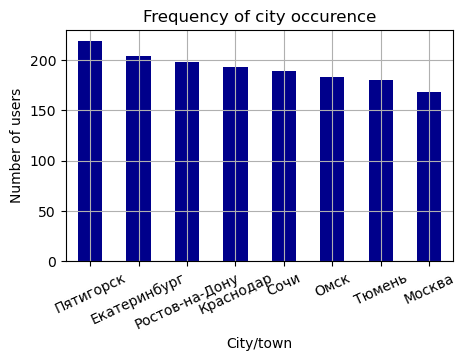

In [19]:
users_city = users['city'].value_counts()
users_city.plot(kind='bar', grid=True, figsize=(5, 3), color='darkblue', 
title = 'Frequency of city occurence',
xlabel = 'City/town',
ylabel = 'Number of users')
plt.xticks(rotation=25)
users_city.describe()



We see that in 2021 the most users of the service were in Pyatigorsk (Пятигорск) - 219 users, the least in Moscow (Москва) - 168 users.

##### Ratio of users with and without subscription:¶

,count
count,2.000000
mean,767.000000
std,96.166522
min,699.000000
25%,733.000000
50%,767.000000
75%,801.000000
max,835.000000


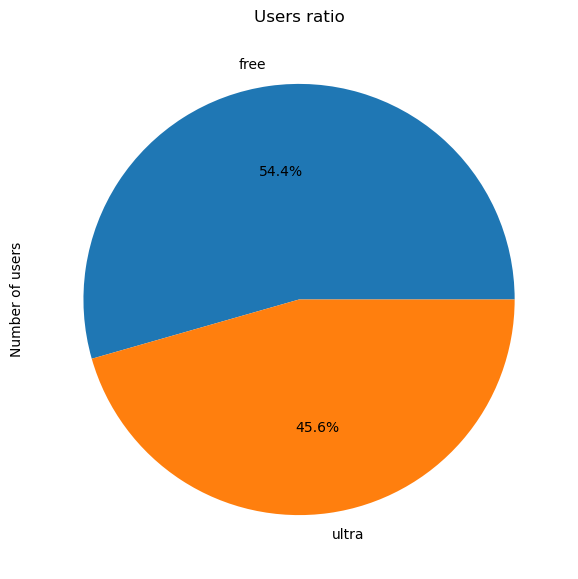

In [20]:
sub_type = users['subscription_type'].value_counts()
sub_type.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Users ratio',
xlabel = 'Subscription type',
ylabel = 'Number of users')
sub_type.describe().to_frame()

We can see that there were slightly more non-subscription users at that time (54.4% vs. 45.6%).

##### Users age:

,age
count,1534.000000
mean,24.903520
std,4.572367
min,12.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,43.000000


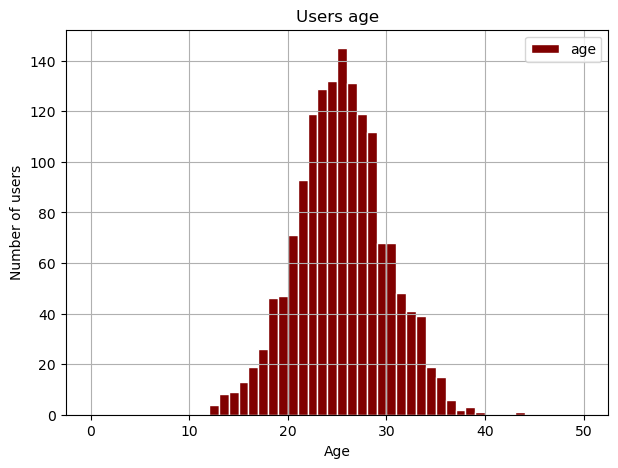

In [21]:
users.plot(y='age', kind='hist', bins=50, grid=True, range=(0, 50), figsize=(7, 5), color='maroon', ec='white',
title = 'Users age',
xlabel = 'Age',
ylabel = 'Number of users')
users['age'].describe().to_frame()

We see an age range of 12-43 years. Normal distribution, with the most frequent age of 25 years.

##### Distance covered:

Let's convert the distance into kilometres.

,distance
count,18068.000000
mean,3.070660
std,1.116831
min,0.000856
25%,2.543226
50%,3.133610
75%,3.776223
max,7.211008


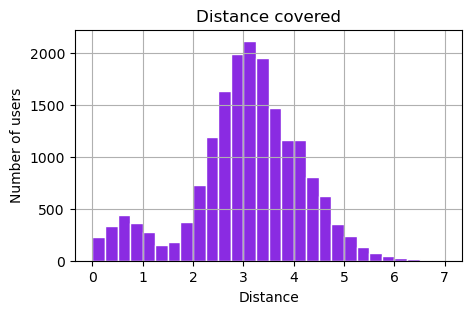

In [22]:
rides_dist = rides['distance'] / 1000
rides_dist.plot(y='distance', kind='hist', bins=28, grid=True, range=(0,7), figsize=(5, 3), color='blueviolet', ec='white',
title = 'Distance covered',
xlabel = 'Distance',
ylabel = 'Number of users')
rides_dist.describe().to_frame()

The graph clearly shows that the majority of the journeys covered 2500-3800 metres. 
A more or less normal distribution is visibleble, the most covered distance per trip was just over 3km.

##### Duration of trips:

,duration
count,18068.000000
mean,17.805011
std,6.091051
min,0.500000
25%,13.597563
50%,17.678395
75%,21.724800
max,40.823963


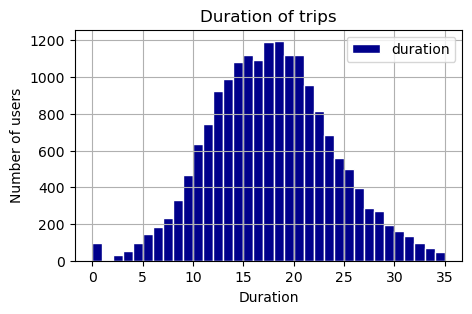

In [23]:
rides.plot(y='duration', kind='hist', bins=35, grid=True, range=(0,35), figsize=(5, 3), color='darkblue', ec='white',
title = 'Duration of trips',
xlabel = 'Duration',
ylabel = 'Number of users')
rides['duration'].describe().to_frame()

We also see a normal distribution with a mean of 17.5 min. There were also trips of half a minute, most likely users changed their mind, so these can be ignored.

#### Merge the data

##### Checking the shape of the tables first:

In [24]:
print(users.shape[0])
print(rides.shape[0])
print(subscriptions.shape[0])

1534
18068
2


##### Let's merge 3 dataframes into one using the merge() method:

In [25]:
go_df = pd.merge(pd.merge(users, rides, on='user_id'), subscriptions, on='subscription_type')
go_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Let's see if everything merged properly and if there are any gaps:

In [26]:
go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month_number       18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


The tables merged properly, now there are 18068 lines as in the biggest table, data from other tables spread across all the lines.

##### Let's create dataframes:

###### With user information without subscription:

In [27]:
free_sub_df = go_df.copy()
free_sub_df = free_sub_df[free_sub_df.subscription_type == 'free']
free_sub_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


###### With information about users with subscription:

In [28]:
ultra_sub_df = go_df.copy()
ultra_sub_df = ultra_sub_df[ultra_sub_df.subscription_type == 'ultra']
ultra_sub_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


##### Let's visualise information about distance and travel times for users by city:

###### Users without subscription:

For a better presentation, let's convert metres into tens of metres, and keep the time in minutes:

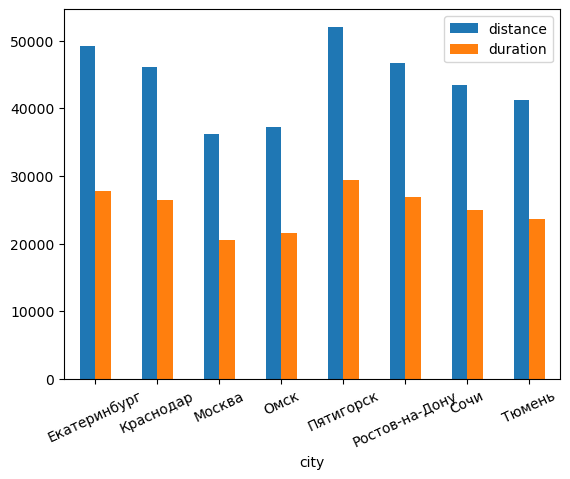

In [29]:
free_sub_df['distance'] = free_sub_df['distance'] / 100
#free_sub_df['duration'] = free_sub_df['duration'] / 60
free_sub_df.pivot_table(index=['city'], values=['distance', 'duration'], aggfunc='sum').plot(kind='bar')
plt.xticks(rotation=25);

###### Users with ultra subscription:

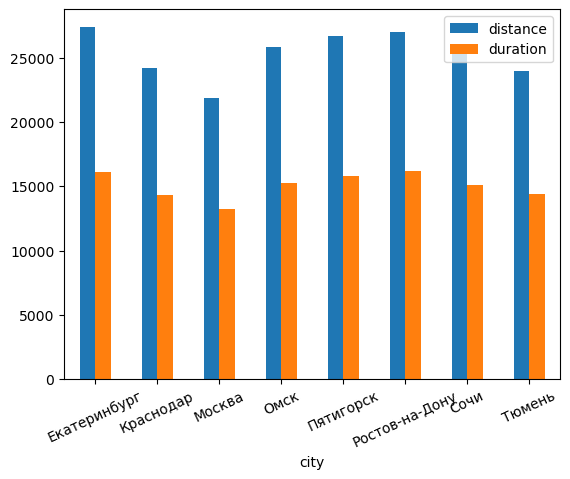

In [30]:
ultra_sub_df['distance'] = ultra_sub_df['distance'] / 100
#ultra_sub_df['duration'] = ultra_sub_df['duration'] / 60
ultra_sub_df.pivot_table(index=['city'], values=['distance', 'duration'], aggfunc='sum').plot(kind='bar')
plt.xticks(rotation=25);

We can see that the duration of the journey grows proportionally to the increase in distance - everything is logical. However, we also note that the distance covered with a subscription is almost twice less than without a subscription.

#### Revenue calculation

First let's round all `duration` values:

In [31]:
go_df['duration'] = np.ceil(go_df['duration'])

##### Let's create a dataframe with aggregated data (total distance, number of trips, and total time for each user for each month):¶

In [32]:
pivot_go = go_df.groupby(['user_id', 'month_number', 'subscription_type']).agg({'distance':['sum', 'count'], 
'duration':'sum', 'minute_price':'first', 'start_ride_price':'first', 'subscription_fee':'first'})

pivot_go.columns=['distance_sum', 'distance_count', 'duration_sum', 'minute_price_sum', 'start_ride_price', 'subscription_fee']

pivot_go.head(10)

distance_sum  distance_count  \
user_id month_number subscription_type                                 
1       1            ultra               7027.511294               2   
        4            ultra                754.159807               1   
        8            ultra               6723.470560               2   
        10           ultra               5809.911100               2   
        11           ultra               7003.499363               3   
        12           ultra               6751.629942               2   
2       3            ultra              10187.723006               3   
        4            ultra               6164.381824               2   
        6            ultra               3255.338202               1   
        7            ultra               6780.722964               2   

                                        duration_sum  minute_price_sum  \
user_id month_number subscription_type                                   
1       1            ultra                      42.0                 6   
        4            ultra                       7.0                 6   
        8            ultra                      46.0                 6   
        10           ultra                      32.0                 6   
        11           ultra                      56.0                 6   
        12           ultra                      28.0                 6   
2       3            ultra                      63.0                 6   
        4            ultra                      40.0                 6   
        6            ultra                      14.0                 6   
        7            ultra                      48.0                 6   

                                        start_ride_price  subscription_fee  
user_id month_number subscription_type                                      
1       1            ultra                             0               199  
        4            ultra                             0               199  
        8            ultra                             0               199  
        10           ultra                             0               199  
        11           ultra                             0               199  
        12           ultra                             0               199  
2       3            ultra                             0               199  
        4            ultra                             0               199  
        6            ultra                             0               199  
        7            ultra                             0               199

##### Let's add a column with monthly revenue from each user without subscription:

Let's check `pivot_go` for missing values:

In [33]:
pivot_go.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1, 'ultra') to (1534, 12, 'free')
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance_sum      11331 non-null  float64
 1   distance_count    11331 non-null  int64  
 2   duration_sum      11331 non-null  float64
 3   minute_price_sum  11331 non-null  int64  
 4   start_ride_price  11331 non-null  int64  
 5   subscription_fee  11331 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 587.6+ KB


In [34]:
pivot_go['monthly_revenue'] = (pivot_go['start_ride_price'] + pivot_go['distance_count']) + \
(pivot_go['minute_price_sum'] * pivot_go['duration_sum']) + pivot_go['subscription_fee']
pivot_go

distance_sum  distance_count  \
user_id month_number subscription_type                                 
1       1            ultra               7027.511294               2   
        4            ultra                754.159807               1   
        8            ultra               6723.470560               2   
        10           ultra               5809.911100               2   
        11           ultra               7003.499363               3   
...                                              ...             ...   
1534    6            free                3409.468534               2   
        8            free                7622.453034               2   
        9            free                4928.173852               1   
        11           free               13350.015305               4   
        12           free                2371.711192               1   

                                        duration_sum  minute_price_sum  \
user_id month_number subscription_type                                   
1       1            ultra                      42.0                 6   
        4            ultra                       7.0                 6   
        8            ultra                      46.0                 6   
        10           ultra                      32.0                 6   
        11           ultra                      56.0                 6   
...                                              ...               ...   
1534    6            free                       26.0                 8   
        8            free                       48.0                 8   
        9            free                       23.0                 8   
        11           free                       78.0                 8   
        12           free                       16.0                 8   

                                        start_ride_price  subscription_fee  \
user_id month_number subscription_type                                       
1       1            ultra                             0               199   
        4            ultra                             0               199   
        8            ultra                             0               199   
        10           ultra                             0               199   
        11           ultra                             0               199   
...                                                  ...               ...   
1534    6            free                             50                 0   
        8            free                             50                 0   
        9            free                             50                 0   
        11           free                             50                 0   
        12           free                             50                 0   

                                        monthly_revenue  
user_id month_number subscription_type                   
1       1            ultra                        453.0  
        4            ultra                        242.0  
        8            ultra                        477.0  
        10           ultra                        393.0  
        11           ultra                        538.0  
...                                                 ...  
1534    6            free                         260.0  
        8            free                         436.0  
        9            free                         235.0  
        11           free                         678.0  
        12           free                         179.0  

[11331 rows x 7 columns]

Rounded the data in the trip duration column, calculated the monthly revenue from each user.

#### Hypothesis testing¶

Let's help product managers increase the number of users with subscriptions:

##### Let's test whether users with subscriptions spend more time on rides:

We make 2 samples, travel time with and without subscription:

In [35]:
duration_free = go_df['duration'].loc[(go_df['subscription_type'] == 'free')]
duration_free

6500     15.0
6501     17.0
6502     21.0
6503     10.0
6504     18.0
         ... 
18063    20.0
18064    22.0
18065    19.0
18066    17.0
18067    16.0
Name: duration, Length: 11568, dtype: float64

In [36]:
duration_ultra = go_df.loc[go_df['subscription_type'] == 'ultra']['duration']
duration_ultra

0       26.0
1       16.0
2        7.0
3       19.0
4       27.0
        ... 
6495    25.0
6496    16.0
6497    15.0
6498    16.0
6499    26.0
Name: duration, Length: 6500, dtype: float64

We assume that the **null hypothesis** is that the time spent by users with and without subscriptions is equal, and the **alternative hypothesis** is that users with subscriptions spend more time than users without subscriptions.

In [37]:
alpha = 0.05
results = st.ttest_ind(duration_ultra, duration_free, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Summary:**  
The hypothesis that the time spent on trips with and without subscriptions are equal does not apply.

##### Let's check if the distance covered by subscription users per trip does not exceed 3130 metres:

Assume that the **null hypothesis** is that the distance of one trip of a user with subscription = 3130 metres, the **alternative** that > 3130 metres.

In [38]:
ultra_distance = go_df.loc[go_df['subscription_type'] == 'ultra']['distance']

max_distance_ultra = 3131

alpha = 0.05 

results = st.ttest_1samp(
    ultra_distance, 
    max_distance_ultra,
      alternative='less')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Reject the null hypothesis')
else:
    print('Do not reject the null hypothesis')

p-value: 0.06703136970271892
Do not reject the null hypothesis


We do not reject the null hypothesis that users with subscriptions travelled 3130m.

##### Let's test whether the monthly revenue from users with subscription is higher than the revenue from users without subscription:

Assume that the **null hypothesis** is that revenue from users with and without subscriptions is equal, the **alternative hypothesis** is that users with subscriptions generate more revenue:

In [39]:
monthly_rev_ultra = pivot_go.query('subscription_type == "ultra"')['monthly_revenue']
monthly_rev_free = pivot_go.query('subscription_type == "free"')['monthly_revenue']

alpha = 0.05
results = st.ttest_ind(monthly_rev_ultra, monthly_rev_free, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('No reason to reject the null hypothesis')


p-value: 1.0859176771749763e-176
Reject the null hypothesis


We reject revenue equality. So as a result of the statistical test, the **null hypothesis** is not confirmed and we can accept the **alternative hypothesis** that the average monthly revenue of Ultra subscription users is higher than the average revenue of Free subscription users.

##### The service's technical team has upgraded the servers with which the mobile application interacts. They hope that, because of this, the number of calls to technical support has significantly decreased. We have a file which have data for each user about the number of calls before and after the update. What test would you need to test this hypothesis? 

Since the new and old population for testing will be paired (dependent), we will pass in scipy.stats.ttest_rel the number of hits before and after. The hypothesis is one-sided, since the technical team hopes that the number of calls to tech support has decreased. The null hypothesis will be rejected if the observed value "moves away" too much from the expected value in our case downward.

**General summary:**

In this study, we prepared and processed the data: corrected data types, checked blanks, removed duplicates.

We added missing data, merged three tables into one for the convenience of calculations for the set tasks, visualised the received information, answered the set questions, worked out the hypotheses.

The main conclusions of the hypotheses testing:

Time spent on travelling with and without subscription is different, it is necessary to carry out additional research and find out which trips are more numerous. Also we got the data that the length of the trip is different, we cannot say that 3130 m is the minimum distance. Also in the study we worked out a hypothesis about the revenue from users with and without subscription, the revenues are definitely not equal, users with subscription bring more revenue.